# K-Means Clustering

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df = pd.read_csv('2019.csv',sep=',')
df = df.drop(['Country or region'], axis='columns', inplace=False)
df = df.drop(['Overall rank'], axis='columns', inplace=False)

In [4]:
df

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [5]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [6]:
# Encoding categorical data
df = encoding_char(df)

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']).round(2)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.00,0.80,0.98,0.86,0.94,0.27,0.87
1,0.97,0.82,0.97,0.87,0.94,0.45,0.91
2,0.96,0.88,0.97,0.90,0.96,0.48,0.75
3,0.94,0.82,1.00,0.90,0.94,0.63,0.26
4,0.94,0.83,0.94,0.88,0.88,0.57,0.66
...,...,...,...,...,...,...,...
151,0.10,0.21,0.44,0.54,0.88,0.38,0.91
152,0.08,0.28,0.54,0.44,0.66,0.49,0.32
153,0.07,0.21,0.32,0.32,0.00,0.28,0.06
154,0.05,0.02,0.00,0.09,0.36,0.42,0.08


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


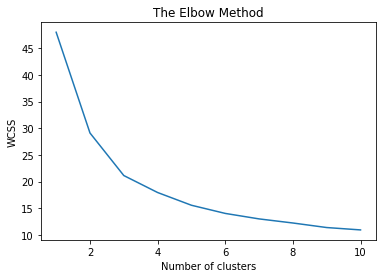

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

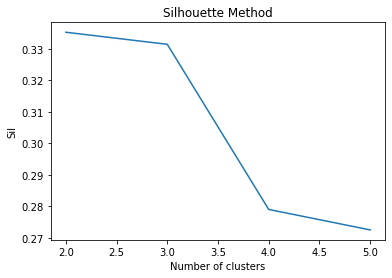

2:0.3352414552489735
3:0.3314171363106993
4:0.2790432142825942
5:0.2725506491656742


In [9]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [11]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.667348,0.686951,0.860489,0.773120,0.705299,0.323552,0.271619
1,0.307084,0.322660,0.577384,0.437966,0.502600,0.330941,0.204677


 В первом кластере страны с высоким общим счетом, ВВП на душу населения, высоким уровнем соц. поддержки, большой продолжительностью жизни и свободой выбора, а также относительно низким уровнем щедрости и низким восприятием коррупции.

 Во второй кластер попали страны с низким общим общим счетом, ВВП на душу населения, не отличающиеся щедростью и не восприимчивы к коррупции; средним уровнем соц. поддержки, средней продолжительностью жизни, свободой выбора.

In [12]:
df = pd.DataFrame(df, columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])

In [13]:
# Less features
X = df.iloc[:, [0, 1, 3, 4]]

In [16]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices']).round(2)

,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices
0,0.75,0.76,0.83,0.79
1,0.47,0.54,0.65,0.57
2,0.26,0.21,0.34,0.47


Теперь в первом кластере находятся страны с наивысшими показателями по всем параметрам, во втором - средними, а в третьем - наименьшими.

In [17]:
# Importing hc clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [18]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.36914417703203195

In [19]:
# Export km clusters
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()